# Exercise

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

df = pd.read_csv("C:/Users/DELL/Downloads/data_jobs.csv")
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [20]:
df_ind = df[(df['job_country']=='United States') & (df['job_title_short']=='Data Analyst')]
df_ind = df_ind.dropna(subset=['salary_year_avg'])

In [21]:
df_ind = df_ind.explode('job_skills')

In [22]:
df_da_ind_grp = df_ind.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

In [25]:
df_top_pay = df_da_ind_grp.sort_values('median', ascending=False).head(10)
df_top_count = df_da_ind_grp.sort_values('count', ascending=False).head(10).sort_values('median', ascending=False).head(10)

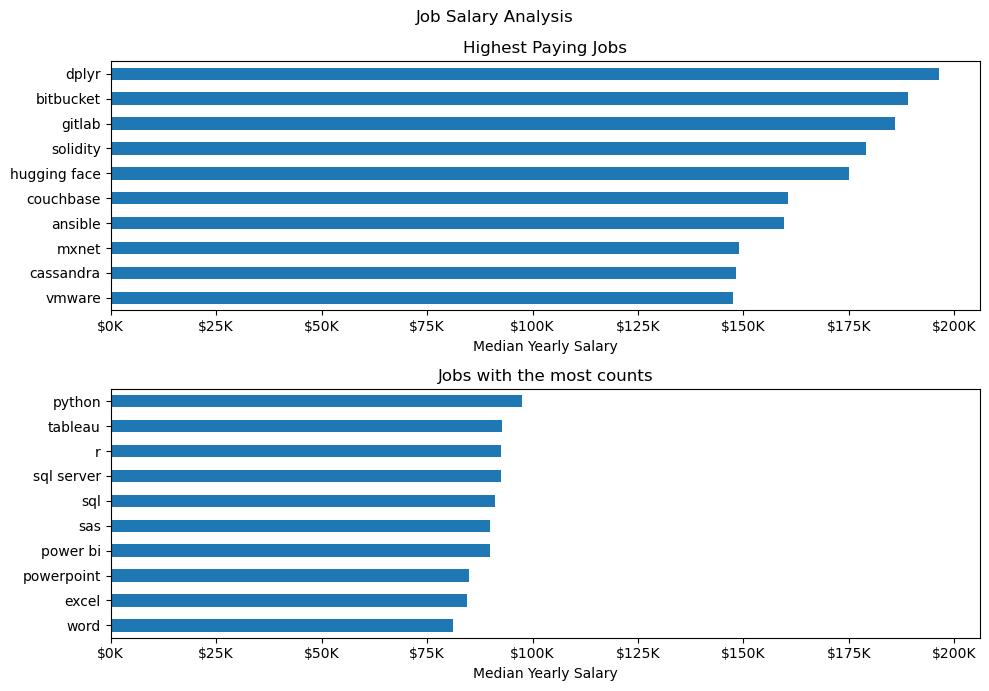

In [43]:
fig, axs = plt.subplots(2, 1, figsize=(10, 7))

df_top_pay.plot(kind='barh', y='median', ax=axs[0], legend=False)
axs[0].set_title('Highest Paying Jobs')
axs[0].invert_yaxis()
axs[0].set_xlabel('Median Yearly Salary')
axs[0].set_ylabel('')
axs[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))



df_top_count.plot(kind='barh', y='median', ax=axs[1], legend=False)
axs[1].set_title('Jobs with the most counts')
axs[1].invert_yaxis()
axs[1].set_xlabel('Median Yearly Salary')
axs[1].set_ylabel('')
axs[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
axs[1].set_xlim(axs[0].get_xlim())

plt.suptitle('Job Salary Analysis')
plt.tight_layout()